#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Mohammad Hosein"
last_name= "Ostadi"
student_number= "99101098"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Use Logistic Regression

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [13]:
#load the data set and fill nan value with 0
# TODO (load dataset)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the images into 784-length vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


AttributeError: ignored

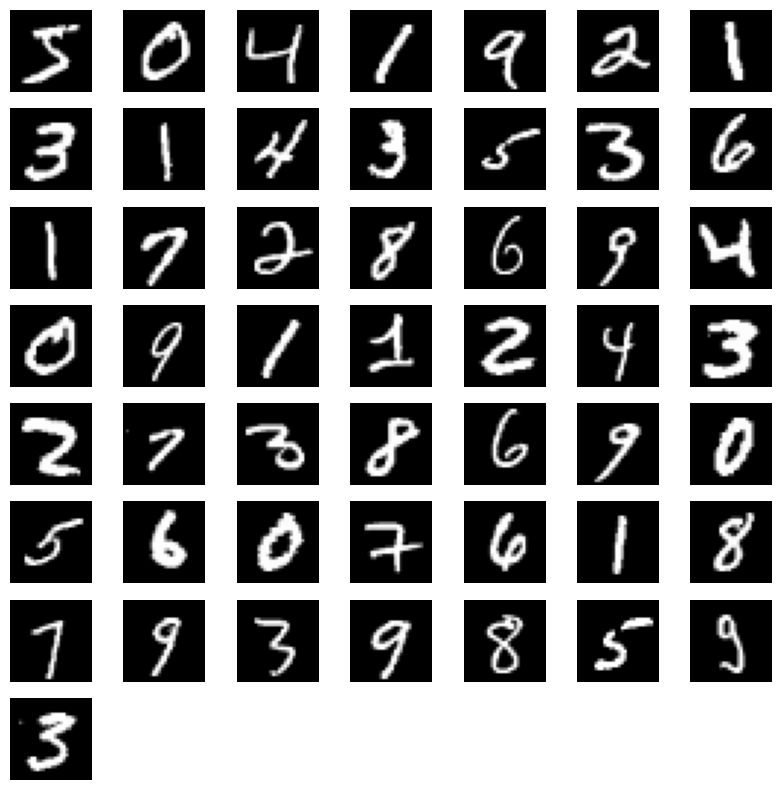

In [5]:
# here show 50 first of this images
def show_images(num_images, X):
    """
    Show the first 'num_images' images from the dataset X.

    Args:
        num_images (int): Number of images to display.
        X (numpy.ndarray): The dataset containing the images.

    Returns:
        None
    """

    # Determine the grid layout (number of rows and columns)
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    # Create a figure and axis for the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    # Loop through and plot the images
    for i in range(num_images):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(X[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

    # Remove any empty subplots if num_images is not a perfect square
    for i in range(num_images, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.show()

# Example usage: Show the first 50 images from your dataset X
X = x_train
Xs = x_test
show_images(50, X)


In [6]:
#TODO scale the data set to [0 1]
#divide data to maximum value.
X = X / 255
Xs = Xs / 255

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [8]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

# Calculate the covariance matrix of the scaled dataset
cov_matrix = np.cov(x_train, rowvar=False)

# Compute the eigenvalues and eigenvectors of the covariance matrix
#'h' refers to right eigenvalues. they same because the matrix is symetric!
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [9]:
explained_variance = 0.8 # you can change this variable to get more components of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#ratio of eigenvalues acts like explained_variance. take note to objective function in PCA:))
#TODO

# Calculate the cumulative variance explained by the eigenvalues
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the number of components required to explain the desired variance
num_components = np.argmax(cumulative_variance >= explained_variance) + 1

# Calculate the compression ratio
compression_ratio = x_train.shape[1] / num_components

print(f"Number of components to explain {explained_variance * 100}% of the variance: {num_components}")
print(f"Compression ratio: {compression_ratio:.2f}")
#calculate the compression_ratio

Number of components to explain 80.0% of the variance: 44
Compression ratio: 17.82


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

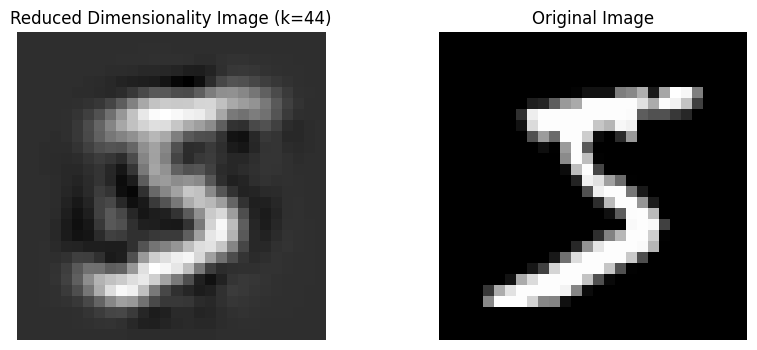

In [10]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

# Project images into the reduced dimensionality eigenbasis
F = X.dot(eigenvectors[:, :num_components])

# Reproject images to the standard basis
X_k = F.dot(eigenvectors[:, :num_components].T)

# Select one sample and reshape it to a 28x28 matrix
sample_index = 0  # Change this index as needed
original_image = x_train[sample_index].reshape(28, 28)
reduced_image = X_k[sample_index].reshape(28, 28)


#TODO
#plot the dimentionally reduced data
#plot the original data

# Plot the dimensionally reduced data (reduced_image) and the original data (original_image)
plt.figure(figsize=(10, 4))

# Plot the reduced data
plt.subplot(1, 2, 1)
plt.imshow(reduced_image, cmap='gray')
plt.title(f'Reduced Dimensionality Image (k={num_components})')
plt.axis('off')

# Plot the original data
plt.subplot(1, 2, 2)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()


## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [14]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  pca = PCA(n_components=n_components)
  projected_data = pca.fit_transform(data)

  return projected_data

In [16]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define and train a machine learning model (e.g., RandomForest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    if print_output:
        print(f"Model Accuracy: {accuracy * 100:.2f}%")

    return accuracy

#...............................................................................the previous function reaches better accuracy faster but it takes 3h to run!
# the below function is faster and reaches the same accuracy but with more components
# we use ML_model2 in the

def ML_model2(X, y, print_output=True):
    """
    Train and evaluate a machine learning model on the given dataset.

    Args:
        X (numpy.ndarray): Input dataset.
        y (numpy.ndarray): Labels.
        print_output (bool): Whether to print the model's accuracy (default: True).

    Returns:
        float: Accuracy of the model on the dataset.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define and train a simpler machine learning model (Logistic Regression)
    model = LogisticRegression(random_state=42, max_iter=100)  # Adjust max_iter as needed
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    if print_output:
        print(f"Model Accuracy: {accuracy * 100:.2f}%")

    return accuracy


#..........................................................................................................................................


In [17]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []

for pc in range(2,101):
    #TODO
    # Perform PCA with the current number of components
    projected_data = do_pca(pc, X)

    # Calculate the accuracy of the model on the projected data
    accuracy = ML_model2(projected_data, y_train, print_output=False)

    # Append accuracy and number of components to the lists
    acc_list.append(accuracy)
    pc_list.append(pc)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

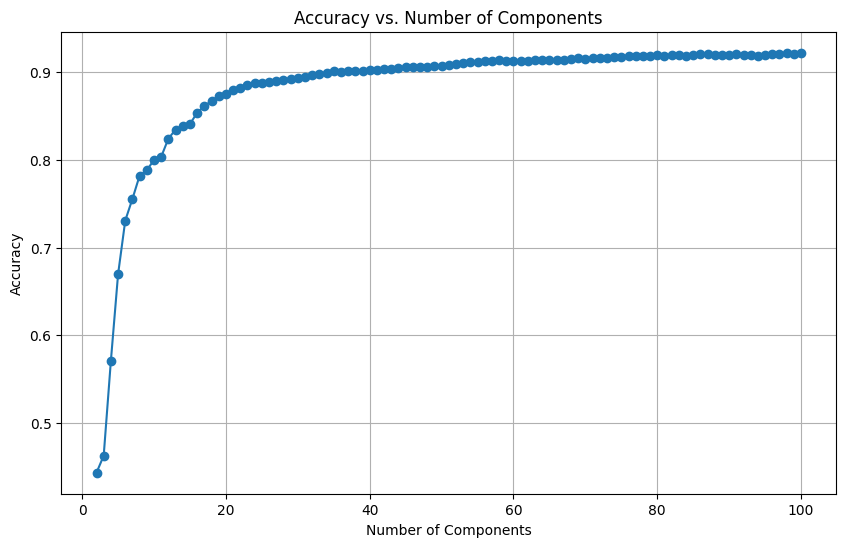

In [18]:
#plot the accuracy based on components.
#TODO
# Plot the accuracy vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(pc_list, acc_list, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.grid(True)
plt.show()

In [19]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
acc_max_val = max(acc_list)
acc_max_ind = acc_list.index(acc_max_val)
print("the number of components which maximize the accuracy is",pc_list[acc_max_ind]," and the max accuracy is ",acc_max_val)

the number of components which maximize the accuracy is 100  and the max accuracy is  0.9223333333333333
